# **IPL Winning Probability predictor**

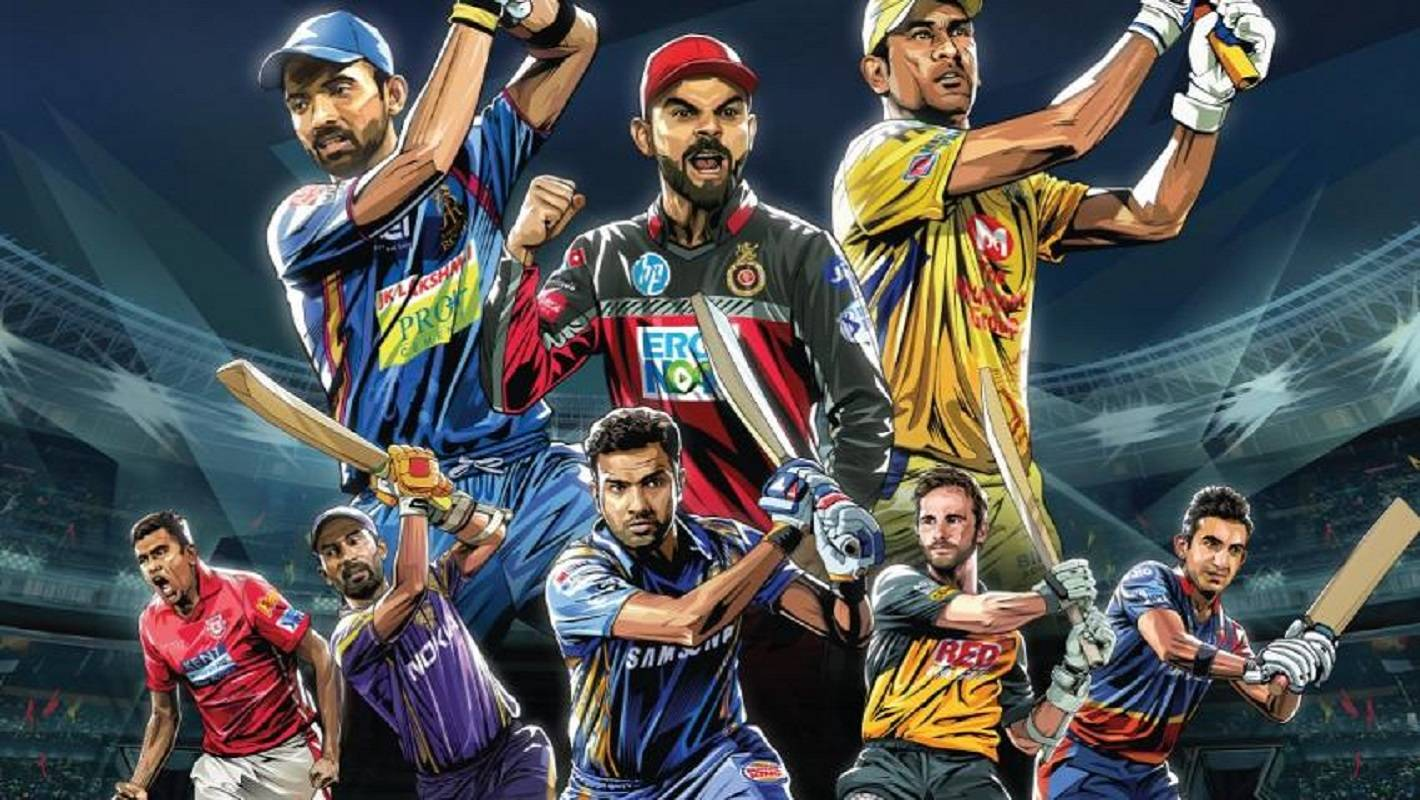

## 1. Importing all the necessary modules, libraries, algorithms and methods

In [1]:
#importing numpy and pandas to create dataframe
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline

## 2. Importing the dataset

### Dataset Link: https://www.kaggle.com/datasets/ramjidoolla/ipl-data-set

In [3]:
# mounting the google drive on colab
# from google.colab import drive
# drive.mount('/content/drive/')

In [4]:
# reading csv file of our data from google drive
# match = pd.read_csv('/content/drive/My Drive/IPL/matches.csv')
# delivery = pd.read_csv('/content/drive/My Drive/IPL/deliveries.csv')
match = pd.read_csv('E:/IPL Project/matches.csv')
delivery = pd.read_csv('E:/IPL Project/deliveries.csv')

## 3. Understanding the datatset

In [5]:
#fetching the result columns unique value, which is the target variable
match['result'].unique()

array(['normal', 'tie', 'no result'], dtype=object)

In [6]:
match.shape # gives the shape of the the (rows * columns)

(756, 18)

In [7]:
delivery.shape

(179078, 21)

In [8]:
match.head() # gives first five rows of the data

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [9]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


# 'Matches' dataset exploration and filteration

In [10]:
match.info() # match dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [11]:
match.isnull().sum() # checking null values

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [12]:
import seaborn as sns # seaborn is a library that uses Matplotlib underneath to plot graphs. It will be used to visualize random distributions.
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Number of matches played in each IPL season')

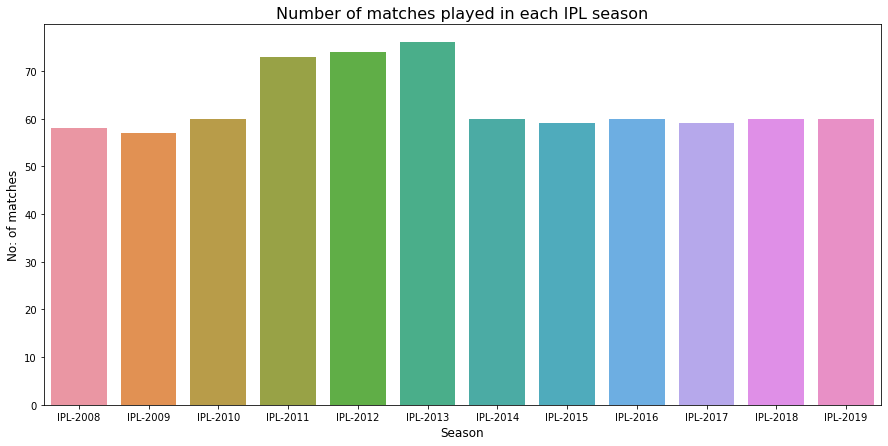

In [13]:
plt.figure(figsize=(15,7))
sns.countplot(x='Season',
              data=match,
              order = match['Season'].value_counts().index.sort_values() # arranging the season of the matches in ascending order on the x-axis
              )
plt.xlabel('Season',fontsize=12)
plt.ylabel('No: of matches',fontsize=12)
plt.title('Number of matches played in each IPL season',fontsize=16)

Text(0.5, 1.0, 'Matches won by the Teams')

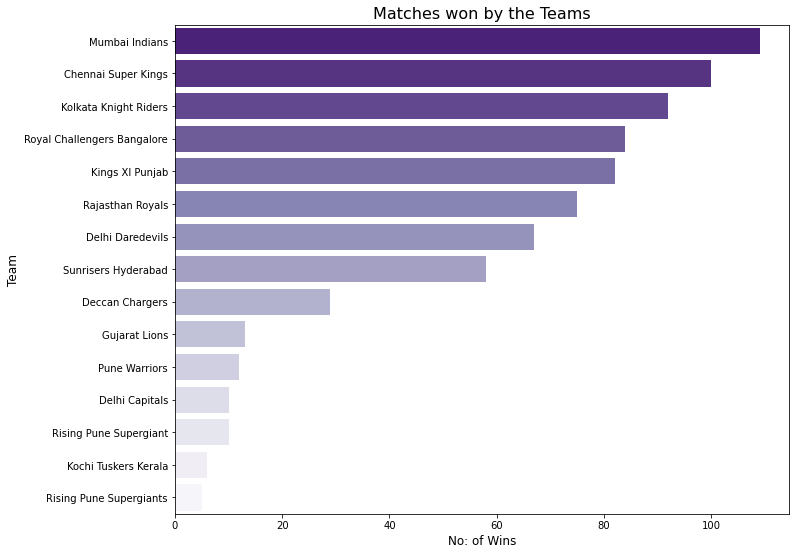

In [14]:
# Matches won by the Teams
plt.figure(figsize = (11,9))
sns.countplot(y = 'winner',
              data = match,
              order= match['winner'].value_counts().index,
              palette = 'Purples_r' )
plt.xlabel('No: of Wins',fontsize=12)
plt.ylabel('Team',fontsize=12)
plt.title('Matches won by the Teams',fontsize=16)

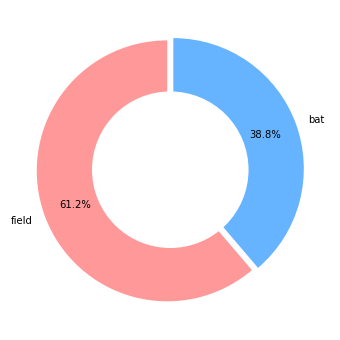

In [15]:
plt.figure(figsize=(6,6))
sizes = match.toss_decision.value_counts()
labels = match.toss_decision.value_counts().index
plt.pie(sizes,colors = ['#ff9999','#66b3ff'],
         labels=labels,
         autopct='%1.1f%%',
         startangle=90,
         pctdistance=0.75,
         explode = (0.025,0.025))

#draw white circle
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

### 'Deliveries' dataset exploration

In [16]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [17]:
delivery.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [18]:
# required columns from above data=['batting_team','bowling_team','city','runs_left','balls_left','wickets_left','total_runs_x','crr','rrr','result']

## 4. Using the above two datasets, to prepare a dataset which contains the above mentioned columns

In [19]:
# for each match_id we calculate total runs for both the innings
# storing this data into a dataframe with index starting from 0

total_score_df=delivery.groupby(['match_id', 'inning']).sum()['total_runs'].reset_index()
total_score_df

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183
...,...,...,...
1523,11413,2,170
1524,11414,1,155
1525,11414,2,162
1526,11415,1,152


In [20]:
# considering only the total_runs of the first innnig

total_score_df = total_score_df[total_score_df['inning']==1]
total_score_df

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [21]:
# merging the data of match and total_score_df(only 2 columns), considering the 'id' column of match and 'match_id' of total_score_df

match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id', right_on='match_id')
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [22]:
#fetching the unique team names from 'team1' column
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

**NOTE:** Here, we will consider only those teams which are playing now and change the names of those teams which have changed their name before 2019.

In [23]:
# teams currently playing and the one which we will be considering

teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [24]:
# replacing the old IPL team names with new names

# use str.replace() to replace a string, repalce() looks for exact matches,
# this replaces the value on the team1 and team2 column on the existing DataFrame object.

match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [25]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [26]:
match_df['team1'].unique() # getting unique teams from team1

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Kochi Tuskers Kerala',
       'Pune Warriors', 'Rising Pune Supergiants'], dtype=object)

In [27]:
# removing the matches in which team1 and team2 or
# (one of them) has been discountinued from IPL

match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [28]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,178
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,148
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [29]:
match_df.shape

(641, 20)

In [30]:
# removing the matches which are interrupted by rain (dl = Duckworth Lewis method)

match_df = match_df[match_df['dl_applied'] == 0]

In [31]:
# fetching only the required columns from match_df

match_df = match_df[['match_id','city','winner','total_runs']]

In [32]:
# merging the data of delivery_df and match_df on 'match_id'

delivery_df = match_df.merge(delivery,on='match_id')

In [33]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [34]:
# keeping all second innings only for the prediction

delivery_df = delivery_df[delivery_df['inning'] == 2]

In [35]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [36]:
# adding the new colum 'current_score' in delivery_df, which is the cumulative sum of the 'total_runs_y'
print(delivery_df['total_runs_y'].dtype)
delivery_df['current_score'] = (
    delivery_df.groupby('match_id')['total_runs_y'].cumsum()
)
# delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']

int64


In [37]:
# adding new column 'runs_left' after each ball

delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [38]:
# adding new column 'balls_left' after each ball

delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [39]:
# player out or not, checking for each ball and replacing it with 1 and 0 respectively, also replacing NaN with 0

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int') # setting the data type of the column as int
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values # calculating the cumulative sum of the wickets
# wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
delivery_df['wickets'] = 10 - wickets # calculating wickets left

In [40]:
# adding column for current run rate i.e. 'crr'
# crr = runs/overs (runs made till now / overs completed)

delivery_df['crr'] = (delivery_df['current_score']*6) / (120 - delivery_df['balls_left'])

In [41]:
# adding column for required run rate
# i.e. 'rrr' = (runs left / balls left)

delivery_df['rrr'] = (delivery_df['runs_left']*6) / delivery_df['balls_left']

In [42]:
# function to fetch batting team (won == 1) or (lost == 0)

def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [43]:
# applying 'result' function on delivery_df along column for each row

delivery_df['result'] = delivery_df.apply(result,axis=1)

In [44]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,result
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,NaN,NaN,1,206,119,10,6.000000,10.386555,0
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,NaN,NaN,1,206,118,10,3.000000,10.474576,0
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,NaN,NaN,1,206,117,10,2.000000,10.564103,0
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,NaN,NaN,3,204,116,10,4.500000,10.551724,0
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,NaN,NaN,7,200,115,10,8.400000,10.434783,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,NaN,NaN,152,0,4,5,7.862069,0.000000,0
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,NaN,NaN,154,-2,3,5,7.897436,-4.000000,0
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,run out,KH Pandya,155,-3,2,4,7.881356,-9.000000,0
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,NaN,NaN,157,-5,1,4,7.915966,-30.000000,0


In [45]:
# creating the final dataframe from delivery dataframe by keeping relevant columns only

final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [46]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72413 entries, 125 to 149577
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   batting_team  72413 non-null  object 
 1   bowling_team  72413 non-null  object 
 2   city          71581 non-null  object 
 3   runs_left     72413 non-null  int64  
 4   balls_left    72413 non-null  int64  
 5   wickets       72413 non-null  int32  
 6   total_runs_x  72413 non-null  int64  
 7   crr           72413 non-null  float64
 8   rrr           72406 non-null  float64
 9   result        72413 non-null  int64  
dtypes: float64(2), int32(1), int64(4), object(3)
memory usage: 5.8+ MB


In [47]:
final_df.isnull().sum() #checking null values

batting_team      0
bowling_team      0
city            832
runs_left         0
balls_left        0
wickets           0
total_runs_x      0
crr               0
rrr               7
result            0
dtype: int64

In [48]:
# creating randomness in final dataframe

final_df = final_df.sample(final_df.shape[0])

In [49]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
40109,Chennai Super Kings,Royal Challengers Bangalore,Chennai,41,32,8,161,8.181818,7.687500,1
131099,Rajasthan Royals,Chennai Super Kings,Jaipur,133,90,8,188,11.000000,8.866667,1
124513,Royal Challengers Bangalore,Mumbai Indians,Mumbai,206,104,10,230,9.000000,11.884615,0
42244,Mumbai Indians,Chennai Super Kings,Chennai,123,87,10,165,7.636364,8.482759,0
46615,Delhi Daredevils,Deccan Chargers,Delhi,59,29,3,145,5.670330,12.206897,0
...,...,...,...,...,...,...,...,...,...,...
104143,Sunrisers Hyderabad,Delhi Daredevils,Visakhapatnam,47,24,6,167,7.500000,11.750000,0
13990,Rajasthan Royals,Deccan Chargers,Jaipur,128,105,10,140,4.800000,7.314286,1
122630,Chennai Super Kings,Kolkata Knight Riders,Chennai,106,52,8,207,8.911765,12.230769,1
63703,Kolkata Knight Riders,Deccan Chargers,Cuttack,85,86,9,126,7.235294,5.930233,1


In [50]:
# dropping the null values

final_df.dropna(inplace=True)

In [51]:
# remove deliveries where (balls_left == 0)

final_df = final_df[final_df['balls_left'] != 0]

### 5. Splitting the final_df

In [52]:
X = final_df.iloc[:,:-1] # rows from 0 to n-1 and columns from 0 to -1
y = final_df.iloc[:,-1] # all rows and -1 means only last column

#train and test ratio is 8:2, assigning the rows randomly

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [53]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
64517,Mumbai Indians,Delhi Daredevils,Delhi,58,17,3,207,8.679612,20.470588
107224,Delhi Daredevils,Kolkata Knight Riders,Kolkata,105,58,9,171,6.387097,10.862069
5106,Royal Challengers Bangalore,Kings XI Punjab,Bangalore,78,64,6,138,6.428571,7.312500
30577,Deccan Chargers,Kolkata Knight Riders,Johannesburg,88,56,9,160,6.750000,9.428571
122638,Chennai Super Kings,Kolkata Knight Riders,Chennai,97,44,7,207,8.684211,13.227273
...,...,...,...,...,...,...,...,...,...
99677,Mumbai Indians,Rajasthan Royals,Mumbai,142,98,9,189,12.818182,8.693878
58058,Mumbai Indians,Royal Challengers Bangalore,Chennai,132,82,8,185,8.368421,9.658537
144682,Chennai Super Kings,Royal Challengers Bangalore,Bengaluru,55,25,5,165,6.947368,13.200000
51027,Rajasthan Royals,Kings XI Punjab,Chandigarh,177,103,9,195,6.352941,10.310680


In [54]:
# Column transformer: Applies transformers to columns of an array or pandas DataFrame.

In [55]:
# One Hot Encoding is used to convert numerical categorical variables into binary vectors

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# The input to this transformer should be an array-like of integers or strings,
# denoting the values taken on by categorical (discrete) features.
# This creates a binary column for each category and returns a sparse matrix or dense array (depending on the sparse parameter)
# drop: Specifies a methodology to use to drop one of the categories per feature.

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city']) # use sparse_output=False, if Type error is thrown.
]
,remainder='passthrough')

In [56]:
# Machine learning pipelines consist of multiple sequential steps that do everything from data extraction and preprocessing to model training and deployment.

# The execution of the workflow is in a pipe-like manner,
# i.e. the output of the first steps becomes the input of the second step.
# Scikit-learn is a powerful tool for machine learning, provides a feature
# for handling such pipes under the sklearn.pipeline module called Pipeline.


### 6. Applying the algorithms

### Random Forest (1)

In [57]:
pipe_rf = Pipeline(steps=[
    ('step1',trf),
    ('step2',RandomForestClassifier())
])

pipe_rf.fit(X_train,y_train)  # fitting our model with the training values

y_pred_rf = pipe_rf.predict(X_test)  # predicting our model for the test values

acc_rf = accuracy_score(y_test, y_pred_rf)  # calculating the accuracy using the predicted and actual values
conf = confusion_matrix(y_test, y_pred_rf)  # getting the confusion matrix of predicted and actual values

print(f"Accuracy Score of Random Forest is : {acc_rf}")  # printing the accuracy as a formatted string
print(f"Confusion Matrix : \n{conf}")  # printing the confusion matrix as a formatted string

Accuracy Score of Random Forest is : 0.9989487700609714
Confusion Matrix : 
[[6730    8]
 [   7 7524]]


### Logistic Regression (2)

In [58]:
pipe_lr = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

pipe_lr.fit(X_train,y_train)

y_pred_lr = pipe_lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")

Accuracy Score of Logistic Regression is : 0.8029294274300932
Confusion Matrix : 
[[5247 1491]
 [1321 6210]]


### KNN (3)

In [59]:
pipe_knn = Pipeline(steps=[
    ('step1',trf),
    ('step2',KNeighborsClassifier())
])

pipe_knn.fit(X_train, y_train)

y_pred_knn = pipe_knn.predict(X_test)

acc_kn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_kn}")
print(f"Confusion Matrix : \n{conf}")

Accuracy Score of KNN is : 0.8958581540402271
Confusion Matrix : 
[[6023  715]
 [ 771 6760]]


### Gradient Boosting (4)

In [60]:
pipe_gb = Pipeline(steps=[
    ('step1',trf),
    ('step2',GradientBoostingClassifier())
])

pipe_gb.fit(X_train, y_train)

y_pred_gb = pipe_gb.predict(X_test)

acc_gb = accuracy_score(y_test, y_pred_gb)
conf = confusion_matrix(y_test, y_pred_gb)

print(f"Accuracy Score of Gradient Boost Classifier is : {acc_gb}")
print(f"Confusion Matrix : \n{conf}")

Accuracy Score of Gradient Boost Classifier is : 0.8423855911416357
Confusion Matrix : 
[[5541 1197]
 [1052 6479]]


### Decision Tree (5)

In [61]:
pipe_dtc = Pipeline(steps=[
    ('step1',trf),
    ('step2',DecisionTreeClassifier())
])

pipe_dtc.fit(X_train,y_train)

y_pred_dtc = pipe_dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")

Accuracy Score of Decision Tree is : 0.9891372906300372
Confusion Matrix : 
[[6658   80]
 [  75 7456]]


### Adaboost Classifier (6)

In [62]:
pipe_ada = Pipeline(steps=[
    ('step1',trf),
    ('step2',AdaBoostClassifier(base_estimator = DecisionTreeClassifier())) # use estimator instead of base_estimator if Type Error is thrown.
])

pipe_ada.fit(X_train, y_train)

y_pred_ada =pipe_ada.predict(X_test)

acc_ada = accuracy_score(y_test, y_pred_ada)
conf = confusion_matrix(y_test, y_pred_ada)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_ada}")
print(f"Confusion Matrix : \n{conf}")

Accuracy Score of Ada Boost Classifier is : 0.9941831943373747
Confusion Matrix : 
[[6700   38]
 [  45 7486]]


### Voting Classifier (7)

In [63]:
# here we create a single model which trains by all above models and predicts output based on their combined majority of voting for each output class.

classifiers = [('Gradient Boosting Classifier', pipe_gb),  ('Decision Tree', pipe_dtc),
               ('Random Forest', pipe_rf), ('Ada Boost', pipe_ada), ('Logistic', pipe_lr),
               ('Knn', pipe_knn)]

vc = VotingClassifier(estimators = classifiers) # estimates using the models mentioned in the classifiers

vc.fit(X_train, y_train) # training our model 'vc' for the training dataset

VotingClassifier(estimators=[('Gradient Boosting Classifier',
                              Pipeline(steps=[('step1',
                                               ColumnTransformer(remainder='passthrough',
                                                                 transformers=[('trf',
                                                                                OneHotEncoder(drop='first',
                                                                                              sparse=False),
                                                                                ['batting_team',
                                                                                 'bowling_team',
                                                                                 'city'])])),
                                              ('step2',
                                               GradientBoostingClassifier())])),
                             ('Decision Tree',
                

In [64]:
y_pred_vc = vc.predict(X_test)

acc_vtc = accuracy_score(y_test, y_pred_vc)
conf = confusion_matrix(y_test, y_pred_vc)

print(f"Accuracy Score of Voting Classifier is : {acc_vtc}")
print(f"Confusion Matrix : \n{conf}")

Accuracy Score of Voting Classifier is : 0.9812881070852898
Confusion Matrix : 
[[6715   23]
 [ 244 7287]]


### 7. Printing the scores of all the above algorithms in a sorted order

In [65]:
# creating a dataframe of the models and their accuracy

models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'Voting Classifier'],
    'Score' : [acc_lr, acc_kn, acc_dtc, acc_rf, acc_ada, acc_gb, acc_vtc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Random Forest Classifier,0.998949
4,Ada Boost Classifier,0.994183
2,Decision Tree Classifier,0.989137
6,Voting Classifier,0.981288
1,KNN,0.895858
5,Gradient Boosting Classifier,0.842386
0,Logistic Regression,0.802929


### 8. Plotting the accuracy score of all the above algorithms

In [66]:
import plotly.express as px

In [67]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', title = 'Models Comparison')

### 9. Predicting the winning and losing probability of a match after each over, and displaying it using a pyplot

In [68]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]  # retreiving the rows as a dataframe for a particular 'match_id'
    match = match[(match['ball'] == 6)]  # considering runs after each over
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)  # predicting winning and losing probability

    # converting the probability into percentage and rounding off it to 1
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)

    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)  # increasing the count of over by 1

    target = temp_df['total_runs_x'].values[0]  # knowing the target value

    runs = list(temp_df['runs_left'].values)  # creating a list of runs left after each over
    new_runs = runs[:]
    runs.insert(0,target)  # inserting target at 0th position

    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)  # calculating run left after each over

    wickets = list(temp_df['wickets'].values)  # creating list of the wickets after each over
    new_wickets = wickets[:]
    new_wickets.insert(0,10)  # inserting 10 at 0th position i.e. 10 wickets are left at the beginning
    wickets.append(0)

    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]  # wickets after each over

    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target  # returning the dataframe and the target



In [69]:
temp_df,target = match_progression(delivery_df,74,pipe_lr)
temp_df

Target- 178


,end_of_over,runs_after_over,wickets_in_over,lose,win
10459,1,4,0,55.2,44.8
10467,2,8,0,49.7,50.3
10473,3,1,0,56.6,43.4
10479,4,7,1,68.3,31.7
10485,5,12,0,58.0,42.0
10491,6,13,0,45.7,54.3
10497,7,9,0,39.9,60.1
10505,8,15,0,26.3,73.7
10511,9,7,0,24.3,75.7
10518,10,17,0,13.2,86.8


Text(0.5, 1.0, 'Target-178')

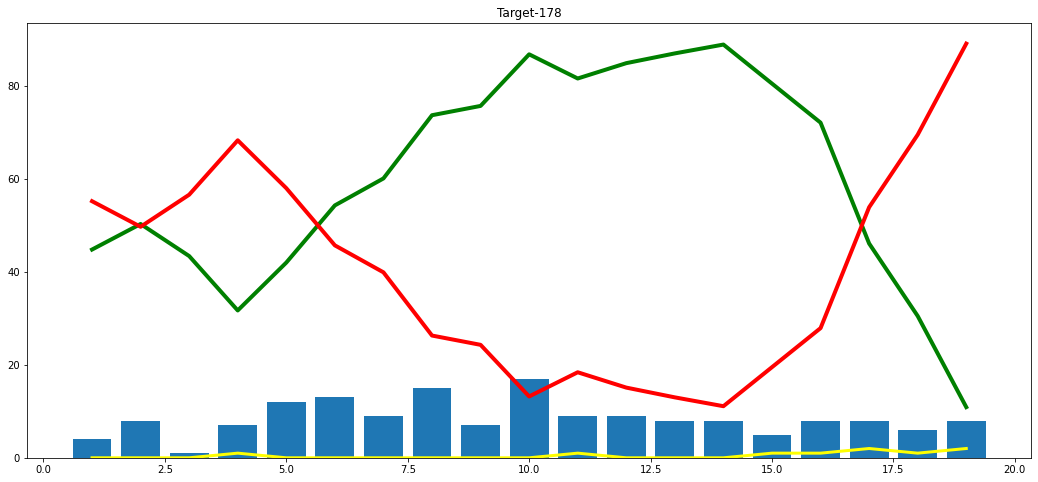

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='green',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

**NOTE:**
#### Green line for win percentage of team playing in second inning of match
#### Red line for loosing percentage of team playing in second inning of match
#### Yellow line shows wickets fallen of team playing in second inning of match

# Thank You!!!
